# Day 39 Lab1. Cross Validation

For this lab, we will build a model on customer churn binary classification problem. 
You will be using files_for_lab/Customer-Churn.csv file.

Instructions
- Apply SMOTE for upsampling the data

- Use logistic regression to fit the model and compute the accuracy of the model.
- Use decision tree classifier to fit the model and compute the accuracy of the model.
- Compare the accuracies of the two models.
- Apply TomekLinks for downsampling

It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
Use logistic regression to fit the model and compute the accuracy of the model.
Use decision tree classifier to fit the model and compute the accuracy of the model.
Compare the accuracies of the two models.
You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [19]:
import pandas as pd
import numpy as np
import sys
import json
import requests
import random


import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston #DATA SETS
from sklearn.datasets import load_iris #DATA SETS
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import t, norm


In [53]:
data = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/39_ML/lab-cross-validation/files_for_lab/Customer-Churn.csv')
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [55]:
churn_dict= {"No" : 0, "Yes" : 1}
data['Churn'] = data.Churn.map(churn_dict)
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [56]:
#y = data['Churn']
#X = data.drop(['Churn'], axis=1)

In [57]:
#=============

X2 = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
y2 = data['Churn']

In [58]:
print(X2.shape)
print(y2.shape)
np.unique(y2)

(7043, 3)
(7043,)


array([0, 1], dtype=int64)

## Apply SMOTE for upsampling the data

#Apply SMOTE for upsampling the data

#Use logistic regression to fit the model and compute the accuracy of the model.º

In [59]:
#Apply SMOTE for upsampling the data

#Use logistic regression to fit the model and compute the accuracy of the model.


from imblearn.over_sampling import SMOTE

smote = SMOTE()
transformer = StandardScaler().fit(X2)
X_scaled = transformer.transform(X2)


Churn
1        5174
0        5174
dtype: int64

In [60]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the LR model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the LR model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the LR model is:  0.73
The kappa of the LR model is:  0.46


In [61]:
#Use decision tree classifier to fit the model and compute the accuracy of the model.

#Compare the accuracies of the two models.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=11)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prob_pred = model.predict_proba(X_test)
print("The accuracy of the DecisionTreeClassifier model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the DecisionTreeClassifier model is: 0.72


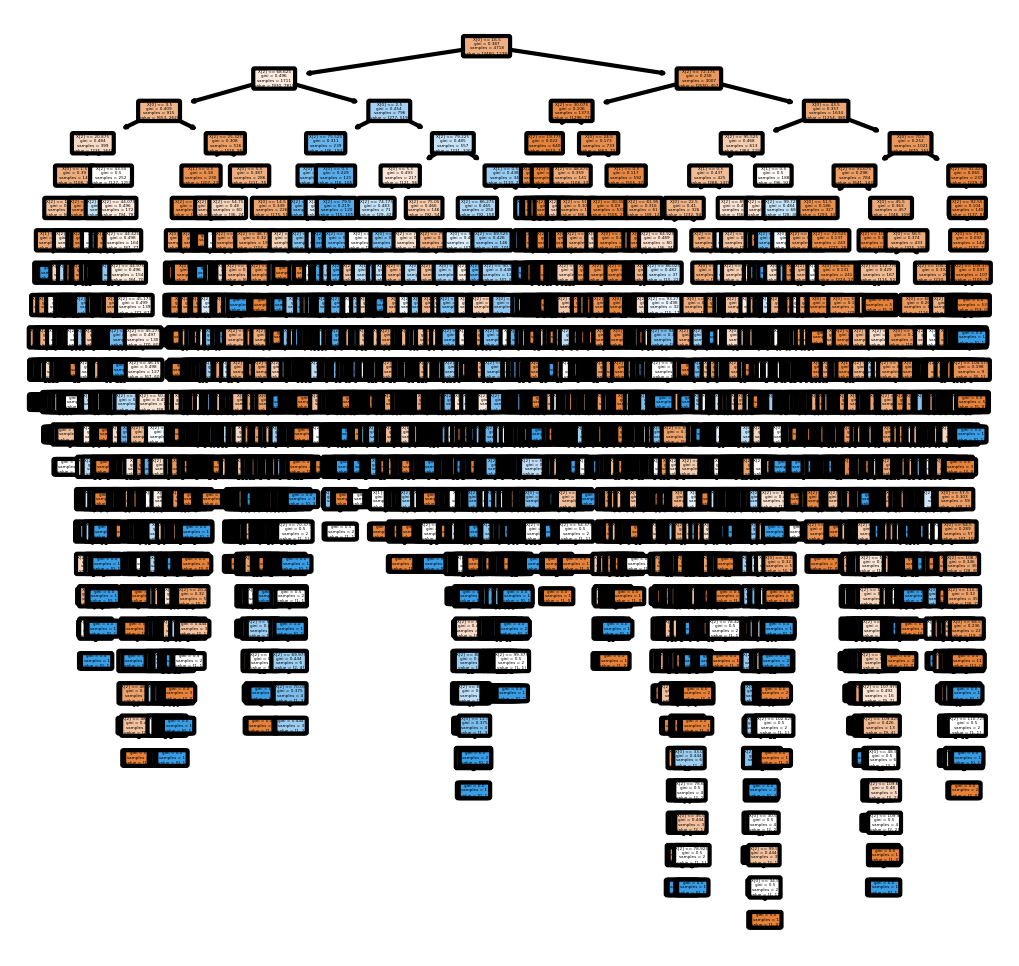

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(model,filled = True, rounded=True)
plt.show() 

------

#### Cross Validation along with logistic regression and decision tree classifier on the data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=11)

model1 = DecisionTreeClassifier()
model2 = LinearRegression()


In [64]:
model_pipeline = [model1, model2]
model_names = ['DecisionTree Classifier', 'Linear Regression']


def confidence_intervals(model_pipeline, model_names, X_train, y_train, alpha = 0.05, K = 10):
# We set the significance level
#alpha = 0.05
#K = 10
    scores = {}
    i=0
    for model in model_pipeline:
        mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=K))
        if (K < 30):
            # t.ppf(area) gives us the critical value corresponding to the area for the t-student distribution.
            t_critical = abs(t.ppf(1-alpha/2, K-1)) 
            interval = t_critical*(np.std(cross_val_score(model, X_train, y_train, cv=K))/np.sqrt(K))
        else:
            # norm.ppf(area) gives us the critical value corresponding to the area for the normal distribution
            z_critical = abs(norm.ppf(1-alpha/2)) 
            interval = z_critical*(np.std(cross_val_score(model, X_train, y_train, cv=K))/np.sqrt(K))
        scores[model_names[i]] = [mean_score, mean_score - interval, mean_score + interval]
        print("The rmse of the {} model is (CV witk K={}) = {:4.2f} +/- {:4.2f}".format(model_names[i], K, mean_score, interval))
        i = i+1

confidence_intervals(model_pipeline, model_names, X_train, y_train, 0.05, 5)

The rmse of the DecisionTree Classifier model is (CV witk K=5) = 0.73 +/- 0.01
The rmse of the Linear Regression model is (CV witk K=5) = 0.22 +/- 0.02


------

## Apply TomekLinks for downsampling

In [12]:
#=============

#X2 = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
#y2 = data['Churn']

In [13]:
print(X2.shape)
print(y2.shape)
np.unique(y2)

(7043, 3)
(7043,)


array([0, 1], dtype=int64)

#Apply TOMEK downsampling the data

#Use logistic regression to fit the model and compute the accuracy of the model.

In [14]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
transformer = StandardScaler().fit(X2)
X_scaled = transformer.transform(X2)
X_tl, y_tl = tl.fit_sample(X_scaled, y2)
pd.DataFrame(y_tl).value_counts()

Churn
0        4694
1        1869
dtype: int64

In [15]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the LR model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the LR model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the LR model is:  0.73
The kappa of the LR model is:  0.46


In [16]:
#Use decision tree classifier to fit the model and compute the accuracy of the model.

#Compare the accuracies of the two models.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=11)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prob_pred = model.predict_proba(X_test)
print("The accuracy of the DecisionTreeClassifier model is: {:4.2f}".format(model.score(X_test, y_test)))

The accuracy of the DecisionTreeClassifier model is: 0.72


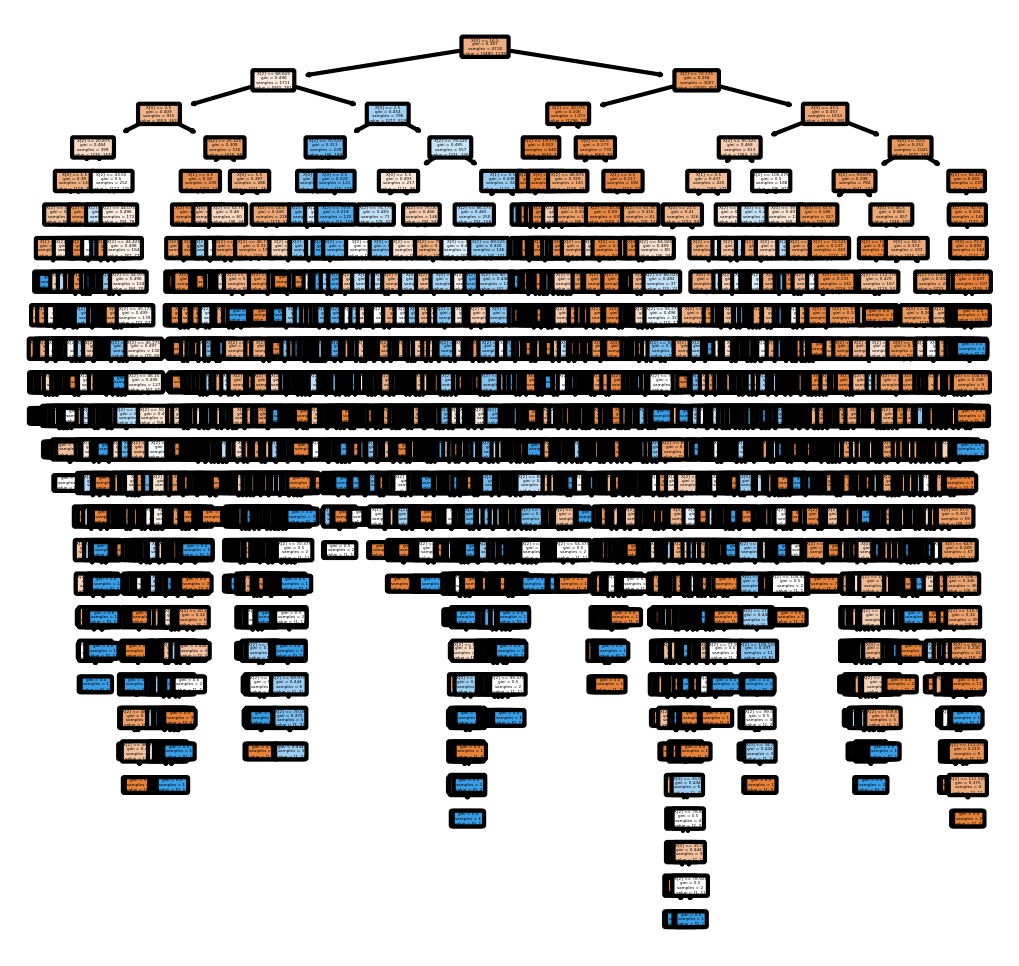

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(model,filled = True, rounded=True)
plt.show() 